In [ ]:
# default_exp block_diagrams

In [ ]:
#hide
%load_ext autoreload
%autoreload 2

In [ ]:
#export
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#hide
%matplotlib inline

# Block diagrams

## Table of content

- Basic components of block diagrams
- How to compose block diagrams together
- Block diagrams and system properties (e.g., Stability, etc)

------------------

## Block Diagrams

- One of the control system engineer’s favorite tools for organizing, communicating, simulating and solving problems
- Standard representation of interconnected systems and subsystems using Transfer Functions
- Makes it easier to identify inputs, outputs and dynamic systems
- Block diagrams show us the interrelationship of systems and how signals flow between them.

   - variables or signals: arrows ($\rightarrow$)
   - systems: blocks with a transfer function, and arrows going in (inputs) and out (outputs)
   - summation node: circle with arrows going in (with the appropriate signs) and an arrow going out
   - branching points: represents two or more variables are replicas of the variable before the branching point

- Always useful during the analysis.

For example: 

<tr>
<td> <img src="img/19.block-diagram-feedback.png" alt="19.block-diagram-feedback" style="width: 500px;"/> </td>
</tr>

## Block Diagram Albegra

- Block diagrams can be quite complex, and when that happens it is useful to know how to calculate the transfer function between a specific input and a specific output.

- For this, it is better to start with some easy cases: **Cascaded, Parallel and Feedback Loop.**

- More complex cases are handled recursively applying these rules. Note that, given that we are restricting the analysis to linear systems, the impact of each input on a specific output is independent of other inputs that can be present (they can all be set to 0).

### Cascaded Blocks

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/20.block-diagram-serie.png" alt="20.block-diagram-serie" style="width: 500px;"/> </td>
</tr>
</table>

This can be easily calculated using algebric manipulation:

$$Y(s)=G_2(s)U(s)$$
$$U(s)=G_1(s)E(s)$$

which means:

$$Y(s)=G_2(s)G_1(s)E(s) \Rightarrow G(s) = G_1(s)G_2(s)$$



### Parallel

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/21.block-diagram-parallel.png" alt="21.block-diagram-parallel" style="width: 300px;"/> </td>
</tr>
</table>

This can be easily calculated using algebric manipulation:

$$Y(s)=G_1(s)R(s) + G_2(s)R(s) + G_3(s)R(s) = (G_1(s) + G_2(s) + G_3(s))R(s)$$

which means:

$$ G(s) = G_1(s) + G_2(s) + G_3(s)$$



Note the presence of:
- _take off points_: allow an unaltered signal to go along multiple paths.
- _summing junctions_: sum or subtract signals

### Feedback Loop

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/22.block-diagram-feedback-simple.png" alt="22.block-diagram-feedback-simple" style="width: 300px;"/> </td>
</tr>
</table>

So, how do we do this one?

$$Y(s)=G_1(s)*E(s)$$
$$E(s)=R(s)-Y_m(s)$$
$$Y_m(s)=G_2(s)Y(s)$$

or 

$$Y(s)=G_1(s)*(R(s)-Y_m(s)) \rightarrow Y(s)=G_1(s)*(R(s)-G_2(s)Y(s)) $$

and finally:

$$Y(s)+G_1(s)G_2(s)Y(s) = G_1(s)*R(s) $$

$$ G(s) = \frac{G_1(s)}{1 + G_1(s)G_2(s)} $$



## Zero-Pole Cancellations

- When we compose systems together we expect the order of the system being equal to the sum of the order of each individual system.

- However, when we compose systems together and calculate the transfer function it might happen that the resulting function has less poles.
   - In this case, we have cancellations that correspond to "hidden" parts of the system.
   
Let's consider an example:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/23.example-2.png" alt="23.example-1" style="width: 500px;"/> </td>
</tr>
</table>



where 

\begin{equation}
G_1(s)=\frac{s+1}{s+2}\;\; \text{and}\;\; G_2(s)=\frac{1}{s}
\end{equation}



We reduce the feedback loop first:

$$G_3(s)=\frac{1/s}{1+1/s} = \frac{1/s}{\frac{s+1}{s}} = \frac{1}{s+1}$$

Then the serie:
$$G(s) = \frac{s+1}{s+2} \frac{1}{s+1} = \frac{1}{s+2} $$

This connection between two systems determined an "hidden" part, which is not visible in the input/output relationship and the system behaves like a first-order one.

## Observability and Controllobality of Interconnected Systems: Cascaded Blocks

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/20.block-diagram-serie.png" alt="20.block-diagram-serie" style="width: 500px;"/> </td>
</tr>
</table>

$$G(s) = G_1(s)G_2(s) = \frac{N_1(s)}{D_1(s)}\frac{N_2(s)}{D_2(s)}$$

- If $N_1(s)$ and $D_2(s)$ have roots in common, then $G(s)$ is not controllable (zero-pole cancellation)

- If $N_2(s)$ and $D_1(s)$ have roots in common, then $G(s)$ is not observable (pole-zero cancellation)

## Observability and Controllobality of Interconnected Systems: Parallel Blocks

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/24.block-diagram-parallel-two.png" alt="24.block-diagram-parallel-two" style="width: 500px;"/> </td>
</tr>
</table>

$$G(s) = G_1(s) + G_2(s) = \frac{N_1(s)}{D_1(s)} + \frac{N_2(s)}{D_2(s)} = \frac{N_1(s)D_2(s) + N_2(s)D_1(s)}{D_1(s)D_2(s)}$$

- Cancellations can happen only when $D_1(s)$ and $D_2(s)$ have common roots (you can bring them out together in the numerator and then cancel them out with those in the denumerator). When this happens, we have a **non-observable and non-controllable** part of the system.

## Observability and Controllobality of Interconnected Systems: Feedback Loop

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/22.block-diagram-feedback-simple.png" alt="22.block-diagram-feedback-simple" style="width: 500px;"/> </td>
</tr>
</table>

$$G(s) = \frac{G_1(s)}{1 + G_1(s)G_2(s)} =\frac{\frac{N_1(s)}{D_1(s)}}{1 + \frac{N_1(s)}{D_1(s)}\frac{N_2(s)}{D_2(s)}} = \frac{N_1(s)D_2(s)}{D_1(s)D_2(s) + N_1(s)N_2(s)}$$

- We have the equivalent of a serie interconnection: $G_1(s)G_2(s)$, same rules apply
- Cancellations occur when $N_1(s)$ and $D_2(s)$ have common factors (you can bring them out together in the numerator and then cancel them out with those in the denumerator):
   - When zero of $G_1(s)$ cancel a pole of $G_2(s)$ then we have a **non-observable and non-controllable** part of the system.
   - When pole of $G_1(s)$ cancel a zero of $G_2(s)$ then we still have a **fully observable and fully controllable** system. This is because the denominator of $G(s)$ does not lose its degree

Example:

- zero of $G_1(s)$ cancels a pole of $G_2(s)$
$$G_1(s)=\frac{s+1}{s+2}, G_2(s)=\frac{s+3}{s+1}$$

$$\Rightarrow G(s)= \frac{\frac{s+1}{s+2}}{1+\frac{s+3}{s+2}} = \frac{s+3}{1+(s+3)}$$

- pole of $G_1(s)$ cancels a zero of $G_2(s)$
$$G_1(s)=\frac{s+1}{s+2}, G_2(s)=\frac{s+2}{s+3}$$

$$\Rightarrow G(s)= \frac{\frac{s+1}{s+2}}{1+\frac{s+1}{s+3}} = \frac{\frac{(s+1)(s+3)}{s+2}}{(s+3)+(s+1)} = \frac{(s+1)(s+3)}{(s+2)((s+3)+(s+1))}$$

## Stability

Let's now analyse the stability of a system which is obtained through a composition of subsystems.

Question:
- Is the asymptotic stability of each indidual subsystem necessary/sufficient to guarantee the stability of the entire system?

Assumption:
-  Each subsystem are represented by rational functions with numerator and denominator prime between them.

### Cascaded Blocks

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/20.block-diagram-serie.png" alt="20.block-diagram-serie" style="width: 500px;"/> </td>
</tr>
</table>

$$G(s) = G_1(s)G_2(s) = \frac{N_1(s)}{D_1(s)}\frac{N_2(s)}{D_2(s)}$$

**No zero-pole cancellations**
- The denominator of $G(s)$ is the product of each denominator, and the poles of $G(s)$ are the union of the poles of each subsystem.
- If and only if, the poles of $G_1(s)$ and $G_2(s)$ have Re $<0$, then $G(s)$ is asymptotically stable.

**Zero-pole/pole-zero cancellations**
- In this case, the overall system has an hidden part corresponding to the zero-pole or pole-zero cancellation. In this case, _if the cancellation is of a pole with Re $>=0$ then the hidden part is not stable and the entire system is not stable_.
- We call these types of cancellations, **critical**.
- Note that this is not visible directly from the T.F.!

### Parallel Blocks

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/24.block-diagram-parallel-two.png" alt="24.block-diagram-parallel-two" style="width: 500px;"/> </td>
</tr>
</table>

$$G(s) = G_1(s) + G_2(s) = \frac{N_1(s)}{D_1(s)} + \frac{N_2(s)}{D_2(s)} = \frac{N_1(s)D_2(s) + N_2(s)D_1(s)}{D_1(s)D_2(s)}$$

The analysis is similar to the previous case (serie).

If there are no cancellations, the poles of $G(s)$ are the product of the poles of $G_1(s)$ and of $G_2(s)$.
- $G(s)$ is asymptotically stable, if and only if, the poles of $G_1(s)$ and $G_2(s)$ have Re $<0$.

If there are cancellations, then the overall system has an hidden part corresponding to the zero-pole or pole-zero cancellation. If the cancellation is of a pole with Re $>=0$ then the hidden part is not stable and the entire system is not stable.

Again, this is not visible analysing the final T.F.

### Feedback Loop

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/22.block-diagram-feedback-simple.png" alt="22.block-diagram-feedback-simple" style="width: 500px;"/> </td>
</tr>
</table>

$$G(s) = \frac{G_1(s)}{1 + G_1(s)G_2(s)} =\frac{\frac{N_1(s)}{D_1(s)}}{1 + \frac{N_1(s)}{D_1(s)}\frac{N_2(s)}{D_2(s)}} = \frac{N_1(s)D_2(s)}{D_1(s)D_2(s) + N_1(s)N_2(s)}$$

- In this case, the poles of the entire system are not only dependednt on the poles of the two subsytems (the numerators are also playing a role).

If we do not have cancellations, then the poles of the systems are the roots of the equation:

$$D_1(s)D_2(s) + N_1(s)N_2(s) = 0$$

_this is called characteristic equation of the feedback system._

We can also write the equation above as:

$$ 1 + \frac{N_1(s)D_2(s)}{D_1(s)D_2(s)} = 0$$

The feedback system is asymptotically stable if and only if the roots of the previous equation are with Re $<0$, but this does not depend on the stability property of the individual systems.


**Critical cancellations**

- Note that when we calculate $\frac{N_1(s)D_2(s)}{D_1(s)D_2(s)}$ we can have _critical cancellations_ and these would correspond to hidden parts of the system (Note that we are assuming to use $y$ or $y_m$ as output variables of the system).
- As before, if these critical cancellations are of poles with Re $\ge0$, these hidden parts are not asymptotically stable and neither is the full system.
- This is not visible from the analysis of the T.F.
- We have to verify if there are _critical_ cancellations before we analyse the stability of the feedback system.


Since the poles of the feedback system are, in general, different from the poles of the individual subsystems, we can use this connection to effectively modify the dynamics of the system, placing the poles where we need them. For example, it is possible to stabilise a non-stable system, or obtain desired performance.

Note that the opposite is also true: we can have a non-stable system even if we the individual subsystems are stable.

## BIBO Stability

- A system is BIBO stable (Bounded Input, Bounded Output) if for each limited input, there is a limited output
- For linear systems: BIBO stability if and only if poles of the transfer functions have Re $<0$
- **Caution! The poles of the T.F. are only those that are controllable and observable!**
- BIBO stability only depends on the forced response of the system.



# Example: Car driving uphill

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/9.car-uphill.png" alt="9.car-uphill.png" style="width: 350px;"/> </td>
</tr>
</table>

We can model a car moving uphill using a linear model (small angle approximation) as:

\begin{equation}
A=\frac{df}{dx}=
\begin{bmatrix}
0 & 1\\
0 & -\frac{\beta}{m}
\end{bmatrix}
\end{equation}

\begin{equation}
B=\frac{df}{du}=
\begin{bmatrix}
0 & 0\\
\frac{\gamma}{m} & -g
\end{bmatrix}
\end{equation}

and

$$\dot{\mathbf{x}}=A\mathbf{x}+B\mathbf{u}$$
$$y=[0 \; 1]\mathbf{x}$$


Note that:
- If $\theta = 0$ and $u=0$ (no slope, and no input)
- then the equilibrium is $\forall x_1$, $x_2=0$ (the position does not matter, speed is 0).
- this system has two inputs: the pedal and gravity


We can calculate the Matrix Transfer Function as:

$$G(s)=C(sI-A)^{-1}Bu$$

\begin{equation}
(sI-A) =
\begin{bmatrix}
s & -1\\
0 & s+\frac{\beta}{m}
\end{bmatrix}
\end{equation}


\begin{equation}
(sI-A)^{-1} = \frac{1}{s(s+ \frac{\beta}{m})} 
\begin{bmatrix}
s+ \frac{\beta}{m} & 1\\
0 & s
\end{bmatrix}
\end{equation}


\begin{equation}
G(s) = \frac{1}{s(s+ \frac{\beta}{m})} 
\begin{bmatrix}
s \frac{\gamma}{m} & -sg
\end{bmatrix} =
\begin{bmatrix}
\frac{\frac{\gamma}{m}}{s+\frac{\beta}{m}} & \frac{-g}{s+\frac{\beta}{m}}
\end{bmatrix}
\end{equation}

If we want to know the T.F. from the pedal to the velocity:

$$G(s)=\frac{\frac{\gamma}{m}}{s+\frac{\beta}{m}}$$

What happens when we apply a step onto the pedal?

Let's study the transfer function and include the input:

$$Y(s) = G(s)U(s)=\frac{\frac{\gamma}{m}}{s+\frac{\beta}{m}} \frac{1}{s} = \frac{\alpha_1}{s+\frac{\beta}{m}} \frac{\alpha_2}{s}$$

where $$\alpha_1=-\frac{\gamma}{\beta}, \; \alpha_2=\frac{\gamma}{\beta}$$

and the inverse transform is:

$$ y(t) = \alpha_1 e^{-\frac{\beta}{m}t} + \alpha_2 1(t)$$

We can implement this in Python:

Let's define the step function first

In [ ]:
from classical_control_theory.intro_to_control_theory import step

# def step(t, step_time=0):
#     """Heaviside step function"""
#     return 1 * (t >= step_time)

And now we can plot the response of the system $y(t)$ to the step input:

In [ ]:
# We decide the parameters of the car
m = 1
beta = 1
gamma = 1

# We set the simulation parameters
t = np.linspace(0, 15)

# Now we can calculate the output of the system
alpha_1 = -gamma/beta
alpha_2 = gamma/beta

y = alpha_1*np.exp(-beta/m*t) + alpha_2*step(t)

And we can plot it:

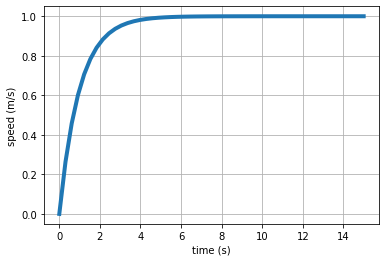

In [ ]:
plt.plot(t, y, linewidth=4)
plt.xlabel('time (s)')
plt.ylabel('speed (m/s)')
plt.grid()

Essentially we predict that the car will increase its speed to try and match our step input.

But what does the actual car do?

We implemented a car already in notebook `02_Intro_to_control_theory`, but here it is again for convenience:

In [ ]:
class Car:
    _g = 9.8 # Gravity
    
    def __init__(self, x0, params):
        self._x_1 = x0[0] # position (along the road)
        self._x_2 = x0[1] # velocity (along the road)
        self._m, self._alpha, self._beta, self._gamma = params
        
    def step(self, dt, u, theta):
        self.theta = theta
        self._x_1 = self._x_1 + dt*self._x_2
        self._x_2 = self._x_2 + dt*(-self._alpha/self._m*abs(self._x_2)*self._x_2 - \
                                    self._beta/self._m*self._x_2 + self._gamma/self._m*u - \
                                    Car._g*np.sin(theta))
        
    def speedometer(self):        
        v = self._x_2
        return (v,)  
    
    # Utility function to simplify plotting
    def sensor_i(self):
        # Rotation matrix to get back to the main frame.
        R = np.array(((np.cos(theta), -np.sin(theta)), (np.sin(theta), np.cos(theta))))
        x_i, y_i = R.dot(np.array([[self._x_1],[0]]))
        v = self._x_2
        return (x_i, y_i, v)

We can now run it:

In [ ]:
# We define the parameters of the car
m = 1
alpha = 1
beta = 1
gamma = 1
params = (m, alpha, beta, gamma)

# Let's define its initial conditions
x_0 = (0,0) # position and speed
theta = np.radians(0) # no slope

# Define the input: step function
u = 1 # input (e.g. 0 or 1)

# Create the car
car = Car(x_0, params)

# run it!
t0, tf, dt = 0, 10, 0.1

#rotation to get back to the inertial frame..
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

position = []
velocity = []
time = []
for t in np.arange(t0, tf, dt):
    car.step(dt, u, theta)
    v = car.speedometer() # this is in the along road frame
    velocity.append(v)
    time.append(t)
    

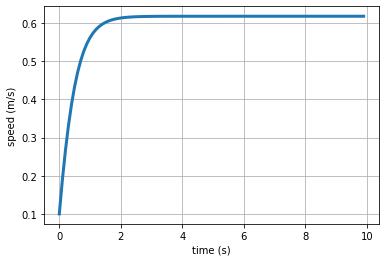

In [ ]:
plt.plot(np.arange(t0, tf, dt), velocity, linewidth=3)
plt.xlabel('time (s)')
plt.ylabel('speed (m/s)')
plt.grid()

Hmm, the speed has a step response but it does not go to 1...

The reason is that the actual car does behave differently from our linear model. Let's try another car:

In [ ]:
#export
class SimplerCar:
    _g = 9.8
    
    def __init__(self, x0, params):
        self._x_1 = x0[0] # position (along the road)
        self._x_2 = x0[1] # velocity
        self._m, self._alpha, self._beta, self._gamma = params
        
    def step(self, dt, u, theta):
        self.theta = theta
        self._x_1 = self._x_1 + dt*self._x_2
        self._x_2 = self._x_2 + dt*(- self._beta/self._m*self._x_2 + \
                                    self._gamma/self._m*u - Car._g*np.sin(theta))
        
    def speedometer(self):        
        v = self._x_2
        return (v,)

And now we can run it again,

In [ ]:
# We define the parameters of the car
m = 1
alpha = 1
beta = 1
gamma = 1
params = (m, alpha, beta, gamma)

# Let's define its initial conditions
x_0 = (0,0) # position and speed
theta = np.radians(0) # no slope

# Define the input: step function
u = 1 # input (e.g. 0 or 1)

# Create the car
car = SimplerCar(x_0, params)

# run it!
t0, tf, dt = 0, 10, 0.1

#rotation to get back to the inertial frame..
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

position = []
velocity = []
time = []
for t in np.arange(t0, tf, dt):
    car.step(dt, u, theta)
    v = car.speedometer() # this is in the along road frame
    velocity.append(v)
    time.append(t)
    

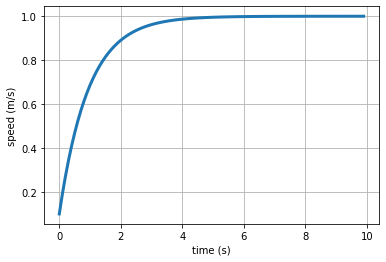

In [ ]:
plt.plot(time, velocity, linewidth=3)
plt.xlabel('time (s)')
plt.ylabel('speed (m/s)')
plt.grid()

Alright! Our linear model represents this second car better.

------------------------------------

## Simplifying block diagrams

Let's now apply the block diagram algebra to some examples:

### Example 1: 

Let's suppose that we have a classic negative feedback:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/24.block-diagram-ex-1-1.png" alt="24.block-diagram-ex-1-1" style="width: 500px;"/> </td>
</tr>
</table>

$B$ and $C$ are in parallel and we can combine them into a single block:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/24.block-diagram-ex-1-3.png" alt="24.block-diagram-ex-1-1" style="width: 500px;"/> </td>
</tr>
</table>

We can now reduce the feedback loop:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/24.block-diagram-ex-1-4.png" alt="24.block-diagram-ex-1-1" style="width: 500px;"/> </td>
</tr>
</table>

And lastly we can combine the two blocks in series:


<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/24.block-diagram-ex-1-51.png" alt="24.block-diagram-ex-1-1" style="width: 500px;"/> </td>
</tr>
</table>

### Creating Unity Feedback

- Sometimes when we manipulate block diagrams we do not want to remove blocks to simplify the diagram, but we would like to restructure the diagram to have it in a specific form.

- For example we would like to make the following equivalent:
<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/24.non-unity-feedback.png" alt="24.non-unity-feedback" style="width: 500px;"/> </td>
<td> <img src="img/24.unity-feedback.png" alt="24.unity-feedback" style="width: 500px;"/> </td>
</tr>
</table>

- We need to determine an $R(s)$ value that makes the two systems equivalent. 
- We need to write the transfer function for each system, set the two equations equal to each other, and then solving for $R(s)$.

$$
\frac{G(s)}{1+G(s)H(s)} = \frac{R(s)}{1+R(s)}  
$$

$$ \Downarrow $$

$$
\frac{G(s) (1+R(s))}{1+G(s)H(s)} = R(s)
$$

$$ \Downarrow $$

$$
\frac{G(s)}{1+G(s)H(s)} = R(s) \bigg( 1- \frac{G(s)}{1+G(s)H(s)} \bigg)
$$

$$ \Downarrow $$

$$
R(s) = \frac{G(s)}{1+G(s)H(s)-G(s)}
$$



Note that we would not be able to easily use this method to go from a unity feedback system to a non-unity feedback system (there will be two unknown variables).

------------------------